# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [4]:
df=pd.read_excel('/content/drive/MyDrive/datatrained/Doc_cons_fee/Final_Train.xlsx')
df.head()

Qualification  ... Fees
0           BHMS, MD - Homeopathy  ...  100
1    BAMS, MD - Ayurveda Medicine  ...  350
2  MBBS, MS - Otorhinolaryngology  ...  300
3             BSc - Zoology, BAMS  ...  250
4                            BAMS  ...  250

[5 rows x 7 columns]

In [5]:
test_df=pd.read_excel('/content/drive/MyDrive/datatrained/Doc_cons_fee/Final_Test.xlsx')
test_df.head()

Qualification  ...                                 Miscellaneous_Info
0                                             MBBS  ...                                                NaN
1       MBBS, Diploma in Otorhinolaryngology (DLO)  ...                                                NaN
2                                       MBBS, DDVL  ...                   70% 4 Feedback KK Nagar, Chennai
3                                             BAMS  ...                                                NaN
4  BDS, MDS - Conservative Dentistry & Endodontics  ...  General Dentistry Conservative Dentistry Cosme...

[5 rows x 6 columns]

# ***EDA***

## preprocessing

In [6]:
df.shape

(5961, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
df.describe()

Fees
count  5961.000000
mean    307.944640
std     190.920373
min       5.000000
25%     150.000000
50%     300.000000
75%     500.000000
max     950.000000

In [9]:
df.describe(include=['O'])

Qualification  ...                                 Miscellaneous_Info
count           5961  ...                                               3341
unique          1420  ...                                               2998
top              BDS  ...  Acrylic Partial Denture Crowns and Bridges Fix...
freq             488  ...                                                 40

[4 rows x 6 columns]

## **checking null value**

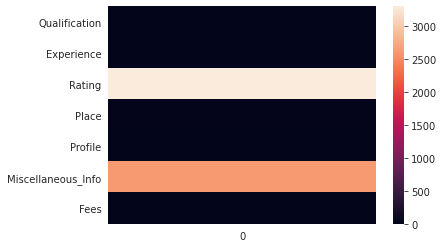

In [10]:
sns.heatmap(df.isnull().sum().to_frame())

In [11]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [12]:
df.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [13]:
df['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
56%       5
68%       5
70%       4
69%       4
72%       3
57%       3
64%       2
63%       2
55%       2
33%       2
62%       2
36%       1
65%       1
48%       1
40%       1
45%       1
7%        1
53%       1
47%       1
58%       1
Name: Rating, dtype: int64

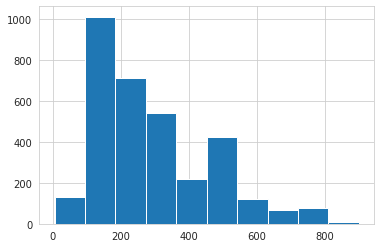

In [14]:
def null_plot(temp,feature):
  temp1=[]
  for i in temp.index:
    if temp.loc[i,[feature]].isnull().all() ==True:
      temp1.append(temp.loc[i,['Fees']].all())

  plt.hist(temp1)
  plt.show()

null_plot(df,'Rating')

(array([ 132., 1564., 1216., 1010.,  490.,  961.,  237.,  187.,  144.,
          20.]),
 array([  5. ,  99.5, 194. , 288.5, 383. , 477.5, 572. , 666.5, 761. ,
        855.5, 950. ]),
 <a list of 10 Patch objects>)

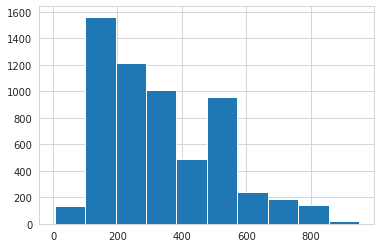

In [15]:
plt.hist(df.Fees)

Distribution of null values with rating and Fees are almost same. so null value can be replaced with random values.

In [16]:
def random_impute(df,variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),replace=True)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample
    return(df)



In [17]:
df=random_impute(df,'Rating')

In [18]:
def rand_dis_top(df,variable):
    random_sample=df[variable].dropna().value_counts().head(10).sample(df[variable].isnull().sum(),replace=True)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample
    return(df)


In [19]:
df=rand_dis_top(df,'Place')

In [20]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [21]:
df.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  886
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [22]:
df.shape

(5961, 7)

around 50% of data is null for feature = Miscellaneous _Info and 2998 unique value is present so this feature should be 1 if value is present and 0 if null

In [23]:
for i in df['Miscellaneous_Info'].value_counts().index:
  df['Miscellaneous_Info'].replace(i,int(1),inplace=True)
df['Miscellaneous_Info'].fillna(int(0),inplace=True)


**Testing dataset**

In [24]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [25]:
test_df=random_impute(test_df,'Rating')# Ramdomly imputing Rating test data

In [26]:
test_df=rand_dis_top(test_df,'Place')

In [27]:
for i in test_df['Miscellaneous_Info'].value_counts().index:
  test_df['Miscellaneous_Info'].replace(i,int(1),inplace=True)
test_df['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [28]:
test_df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

## **Visualization and feature eng**

**Changing Data type**

In [29]:
def split_int(df,feature,sep):
  temp=[]
  for i in df[feature]:
    temp.append(int(i.split(sep)[0]))

  df[feature]=temp

In [30]:
split_int(df,'Experience',' ')

In [31]:
split_int(df,'Rating','%')

**Test dataset**

In [32]:
split_int(test_df,'Experience',' ')
split_int(test_df,'Rating','%')

In [33]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  sns.scatterplot(x=i,y='Fees',data=df,hue='Profile')
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

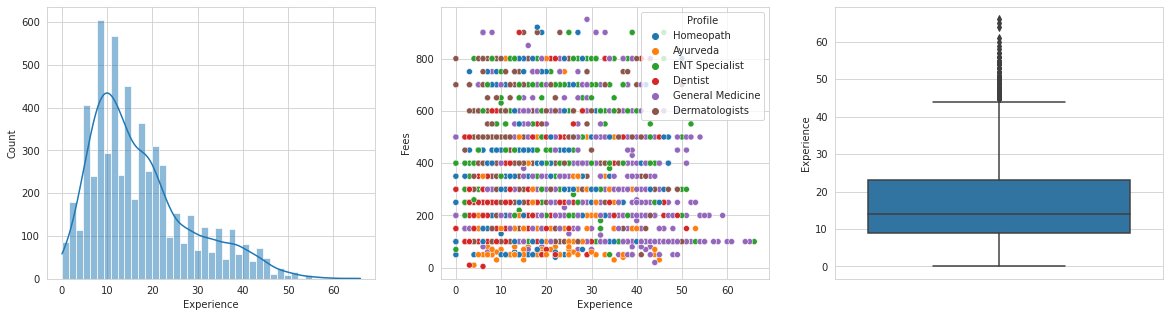

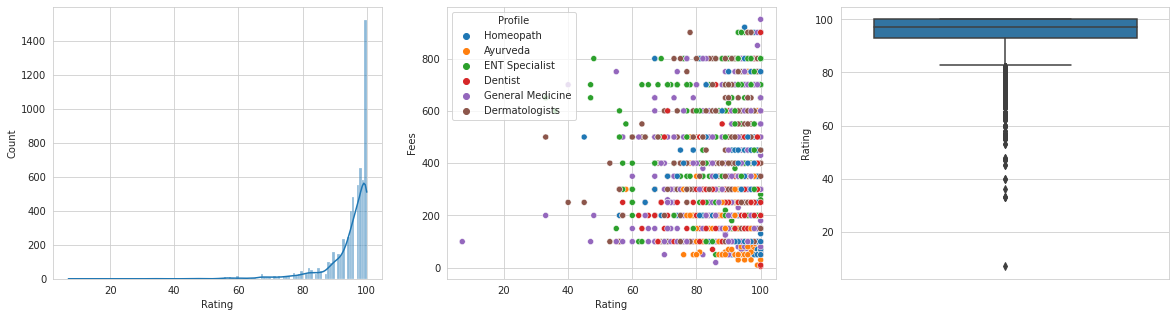

In [34]:
import scipy.stats as stat
import pylab 
for i in ['Experience','Rating']:
  pplot(df,i)

Experience - Right skewed, not linearly related to Fees, High outliers

Rating - Leaft skewed, not linearly related to Fees, High outliers



Data filtering:-

In [35]:
df.head()

Qualification  Experience  ...  Miscellaneous_Info Fees
0           BHMS, MD - Homeopathy          24  ...                 1.0  100
1    BAMS, MD - Ayurveda Medicine          12  ...                 1.0  350
2  MBBS, MS - Otorhinolaryngology           9  ...                 0.0  300
3             BSc - Zoology, BAMS          12  ...                 1.0  250
4                            BAMS          20  ...                 1.0  250

[5 rows x 7 columns]

seprating place to city and local location will reduce randomness in place feature

In [36]:
# function to seprate place
def sep_place(df,feature,sep,k):
  temp=[]
  for i in df[feature]:
    temp.append(str(i).split(sep)[k])

  return(temp)


In [37]:
df['City']=sep_place(df,'Place',',',-1)
test_df['City']=sep_place(test_df,'Place',',',-1)

In [38]:
df['local_loc']=sep_place(df,'Place',',',0)
test_df['local_loc']=sep_place(test_df,'Place',',',0)

In [39]:
df['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

In [40]:
temp_df=pd.DataFrame()
no_of_rows=pd.DataFrame()
k=[]
for i in df.Qualification:
  for j in i.split(','):
    k.append(j.split('-')[0])
  temp_df=pd.concat([temp_df,pd.DataFrame(k).T],axis=0,ignore_index=True)
  k=[]
  no_of_rows=pd.concat([no_of_rows,pd.Series(pd.DataFrame(i.split(',')).T.shape[1])],axis=0,ignore_index=True)

temp_df=pd.concat([temp_df,no_of_rows],axis=1,ignore_index=True)

In [41]:
k=list(temp_df[0].value_counts()[:20].index)
for i in [1,2,3]:
  for j in list(temp_df[i].value_counts()[:20].index):
    if j in k:
      print(j)
    else:
      k.append(j) 

 Venereology & Leprosy
 DNB 
 MBBS
 MD 
 MS 
 Diploma in Otorhinolaryngology (DLO)
 DNB
 DDV
 Post Graduate Diploma in Diabetology (PGDD)
 MDS 
 DDVL
 BDS
 DNB 
 MBBS
 MD 
 Venereology & Leprosy
 Diploma in Otorhinolaryngology (DLO)
 DNB
 Diploma in Dermatology
 MS 
 FRGUHS
 Fellowship in Aesthetic Medicine
 DDVL
 Fellow of Academy of General Education (FAGE)
 Post Graduate Diploma in Diabetology (PGDD)
 Fellowship in Diabetology



MBBS,BDS,BAMS,MD,BHMS,Fellowship,DLO,MLO,DNB,DDVL,MS, etc these qualifications are present in a very high number. 
So, we are going to add features of those and add values '1' or '0' as if they are present or not. 

In [42]:
# func to make feature 
def fun(arr,string):
  arr=[]
  for data in dat:
    if data.find(string) !=-1:
      arr.append(int(1))
    else :
      arr.append(int(0))
  return(arr)

cols=k

In [43]:
dat=df['Qualification']
df1=pd.DataFrame()
qul=[]
for i in cols:
  df1=pd.concat([df1,pd.DataFrame(fun(qul,i))],axis=1)
df1=pd.concat([df1,temp_df[10]],axis=1)
cols.append('total')
df1.columns=cols


df=pd.concat([df,df1],axis=1)
df.head()

Qualification  Experience  Rating  ...  FRCS   UK)  total
0           BHMS, MD - Homeopathy          24     100  ...      0    0    2.0
1    BAMS, MD - Ayurveda Medicine          12      98  ...      0    0    2.0
2  MBBS, MS - Otorhinolaryngology           9      97  ...      0    0    2.0
3             BSc - Zoology, BAMS          12      99  ...      0    0    2.0
4                            BAMS          20     100  ...      0    0    1.0

[5 rows x 64 columns]

In [44]:
df.tail()

Qualification  Experience  Rating  ...  FRCS   UK)  total
5956               MBBS, MS - ENT          19      98  ...      0    0    2.0
5957                         MBBS          33      91  ...      0    0    1.0
5958                         MBBS          41      97  ...      0    0    1.0
5959  MBBS, MD - General Medicine          15      90  ...      0    0    2.0
5960      BDS, MDS - Orthodontics          17     100  ...      0    0    2.0

[5 rows x 64 columns]

In [45]:
test_df

Qualification  ...         local_loc
0                                                MBBS  ...    Ghatkopar East
1          MBBS, Diploma in Otorhinolaryngology (DLO)  ...  West Marredpally
2                                          MBBS, DDVL  ...          KK Nagar
3                                                BAMS  ...   New Ashok Nagar
4     BDS, MDS - Conservative Dentistry & Endodontics  ...    Kanakpura Road
...                                               ...  ...               ...
1982                         BAMS, Doctor of Medicine  ...      Basavanagudi
1983   MD - Dermatology , Venereology & Leprosy, MBBS  ...           Choolai
1984         MBBS, MD / MS - Obstetrics & Gynaecology  ...             Porur
1985                                              BDS  ...           Arekere
1986   MBBS, MD - Dermatology , Venereology & Leprosy  ...      Pallikaranai

[1987 rows x 8 columns]

**test dataset**

In [47]:
dat=test_df['Qualification']
df1=pd.DataFrame()
qul=[]
for i in cols:
  df1=pd.concat([df1,pd.DataFrame(fun(qul,i))],axis=1)



no_of_rows=pd.DataFrame()
for i in test_df.Qualification:
  no_of_rows=pd.concat([no_of_rows,pd.Series(pd.DataFrame(i.split(',')).T.shape[1])],axis=0,ignore_index=True)

df1=pd.concat([df1,no_of_rows],axis=1)

cols.append('total')
df1.columns=cols


test_df=pd.concat([test_df,df1],axis=1)
test_df.head()

Qualification  Experience  ... total total
0                                             MBBS          35  ...     0   1.0
1       MBBS, Diploma in Otorhinolaryngology (DLO)          31  ...     0   2.0
2                                       MBBS, DDVL          40  ...     0   2.0
3                                             BAMS           0  ...     0   1.0
4  BDS, MDS - Conservative Dentistry & Endodontics          16  ...     0   2.0

[5 rows x 64 columns]

In [48]:
df.drop('Qualification',axis=1,inplace=True)
test_df.drop('Qualification',axis=1,inplace=True)

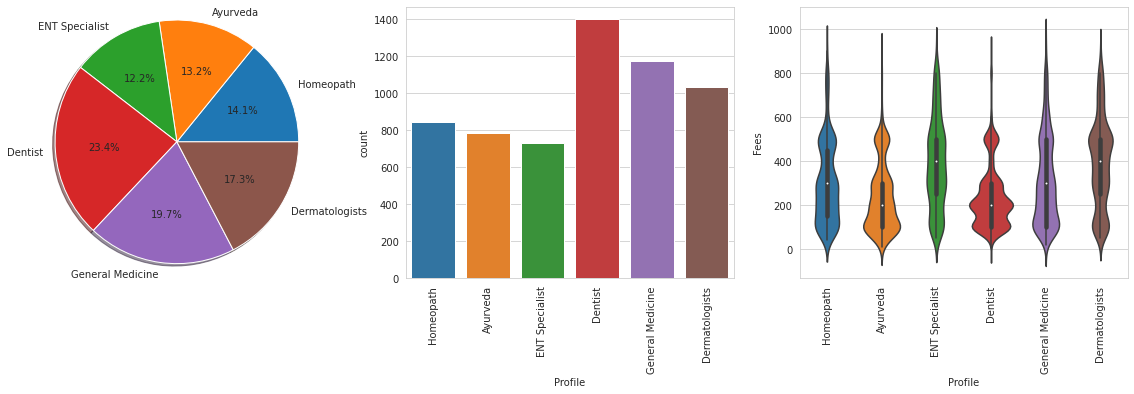

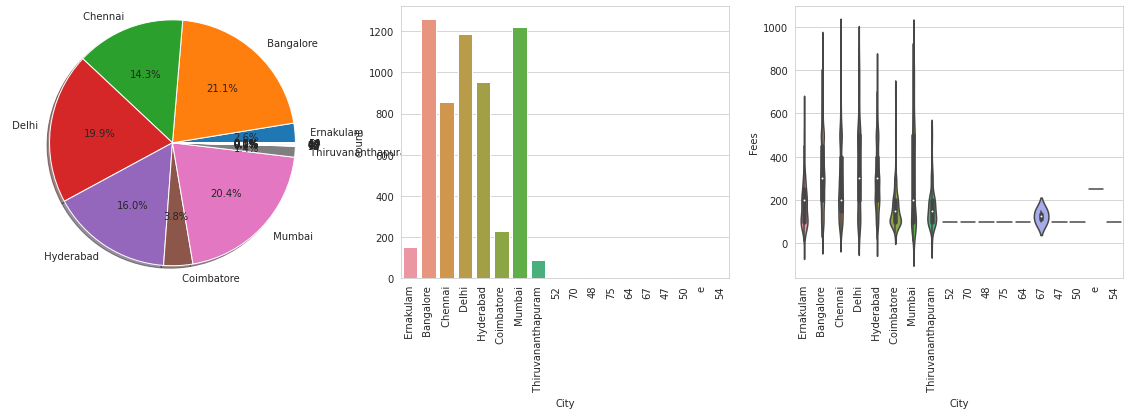

In [49]:

for i in ['Profile','City']:
  labels=df[i].unique().tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2)
  ax2.set_xticklabels(labels=labels,rotation=90)
  sns.violinplot(x=i,y='Fees',data=df,ax=ax3)
  ax3.set_xticklabels(labels=labels,rotation=90)
  plt.show()


**In this data set maximum doctors have their profile as Dentist and lowest as ENT specialist. Whereas the  doctor having the highest  mean Fees have they profile as ENT specialist and the  dermatology  on the other hand profile having Ayurveda and dentist are having least mean Fees.**

**City Bangalore has the highest number of doctors according to the data set. Cities like Bangalore, Hyderabad, and Delhi are having fees than other City**


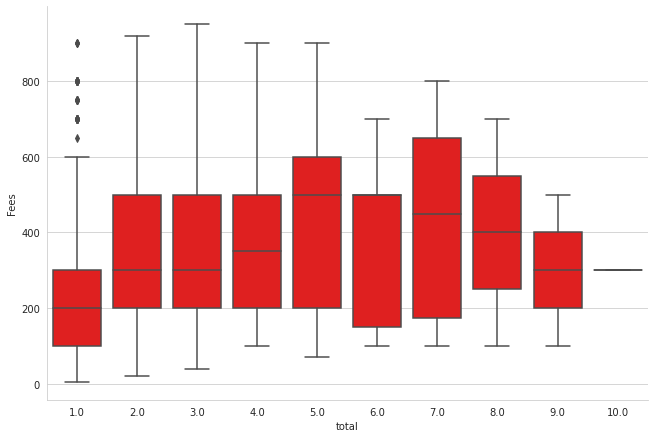

In [50]:
sns.catplot(x='total',y='Fees', data=df,kind='box',height=6,aspect= 1.5,color='r')
plt.show()

This catplot shows that the charges also vary with the total qualification of the doctors. yhere is quadratic relation b/n fees and total

In [51]:
test_df.drop('Place',axis=1,inplace=True)
df.drop('Place',axis=1,inplace=True)

In [52]:
df.nunique()[:10]

Experience             64
Rating                 51
Profile                 6
Miscellaneous_Info      2
Fees                   40
City                   18
local_loc             875
MBBS                    2
BDS                     2
BAMS                    2
dtype: int64

local_loc has too much of variability so its better to convert it into high price and low price in the city. 

In [53]:
test_df['local_loc']=test_df['local_loc'].replace(list(test_df['local_loc'].loc[test_df['local_loc']==j]),1)

In [54]:
test_df['local_loc'].loc[test_df['local_loc']==j]

Series([], Name: local_loc, dtype: object)

In [55]:

k=0
for i in test_df['City'].unique():
  temp_df=df.loc[df['City']==i]
  temp_df1=test_df.loc[test_df['City']==i]
  me=temp_df['Fees'].mean()
  for j in temp_df1['local_loc'].unique():
    if temp_df['Fees'].loc[temp_df['local_loc']==j].mean()>me:
      test_df['local_loc']=test_df['local_loc'].replace(list(test_df['local_loc'].loc[test_df['local_loc']==j]),1)
    else:
      test_df['local_loc']=test_df['local_loc'].replace(list(test_df['local_loc'].loc[test_df['local_loc']==j]),0)

In [56]:
k=0
for i in df['City'].unique():
  temp_df=df.loc[df['City']==i]
  me=temp_df['Fees'].mean()
  for j in temp_df['local_loc'].unique():
    if temp_df['Fees'].loc[temp_df['local_loc']==j].mean()>me:
      df['local_loc']=df['local_loc'].replace(list(df['local_loc'].loc[df['local_loc']==j]),1)
    else:
      df['local_loc']=df['local_loc'].replace(list(df['local_loc'].loc[df['local_loc']==j]),0)

In [57]:
test_df['local_loc'].value_counts()

0    994
1    993
Name: local_loc, dtype: int64

In [58]:
df['local_loc'].value_counts()

0    5917
1      44
Name: local_loc, dtype: int64

## Encoding

In [59]:
test_df.head()

Experience  Rating           Profile  ...   UK)  total  total
0          35      97  General Medicine  ...     0      0    1.0
1          31      78    ENT Specialist  ...     0      0    2.0
2          40      70    Dermatologists  ...     0      0    2.0
3           0      80          Ayurveda  ...     0      0    1.0
4          16     100           Dentist  ...     0      0    2.0

[5 rows x 62 columns]

In [60]:
ohe=pd.get_dummies(df['Profile'],drop_first=True)# one hot encoding for Profile

In [61]:
test_ohe=pd.get_dummies(test_df['Profile'],drop_first=True)# one hot encoding for Profile

In [62]:
# ordinal(rank) accordind to fees
labels=df.groupby('City')['Fees'].mean().sort_values().index
k=0
for i in list(labels):
  k=k+1
  df['City'].loc[df['City']==i]=k
  if i in list(test_df['City'].unique()):
    test_df['City']=test_df['City'].replace(list(test_df['City'].loc[test_df['City']==i]),k)
df['City']=df['City'].astype('float')
test_df['City']=test_df['City'].astype('float')

In [63]:
test_df.nunique()

Experience                             57
Rating                                 36
Profile                                 6
Miscellaneous_Info                      2
City                                    9
                                       ..
 Fellowship In Cosmetic Dermatology     2
 FRCS                                   2
 UK)                                    2
total                                   1
total                                   9
Length: 62, dtype: int64

In [64]:
df.nunique()

Experience                             64
Rating                                 51
Profile                                 6
Miscellaneous_Info                      2
Fees                                   40
                                       ..
 MRCP (UK)                              2
 Fellowship In Cosmetic Dermatology     2
 FRCS                                   2
 UK)                                    2
total                                  10
Length: 62, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 62 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Experience                                             5961 non-null   int64  
 1   Rating                                                 5961 non-null   int64  
 2   Profile                                                5961 non-null   object 
 3   Miscellaneous_Info                                     5961 non-null   float64
 4   Fees                                                   5961 non-null   int64  
 5   City                                                   5961 non-null   float64
 6   local_loc                                              5961 non-null   int64  
 7   MBBS                                                   5961 non-null   int64  
 8   BDS                                             

In [66]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in ['Experience','Rating']:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=['Experience','Rating'])


In [67]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

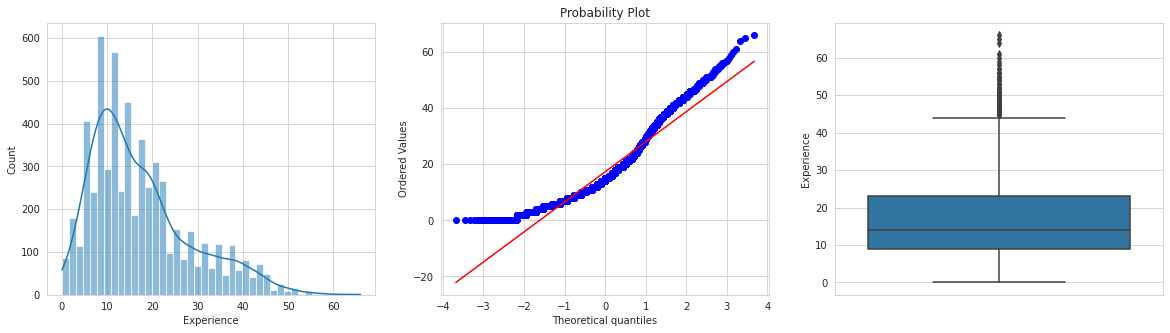

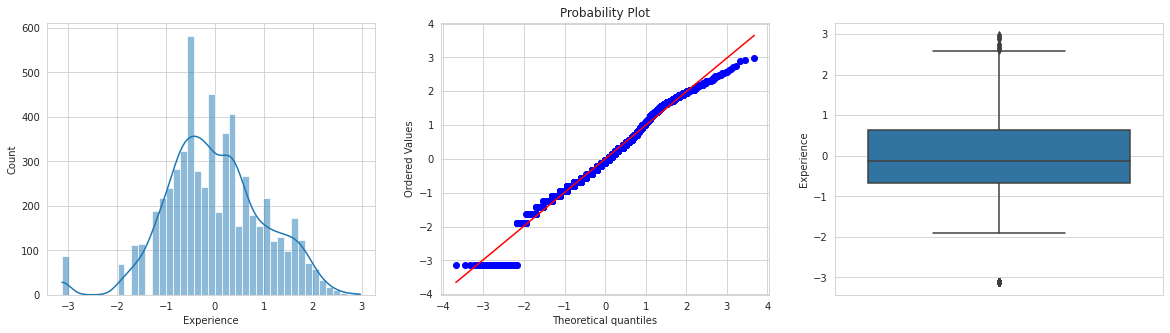

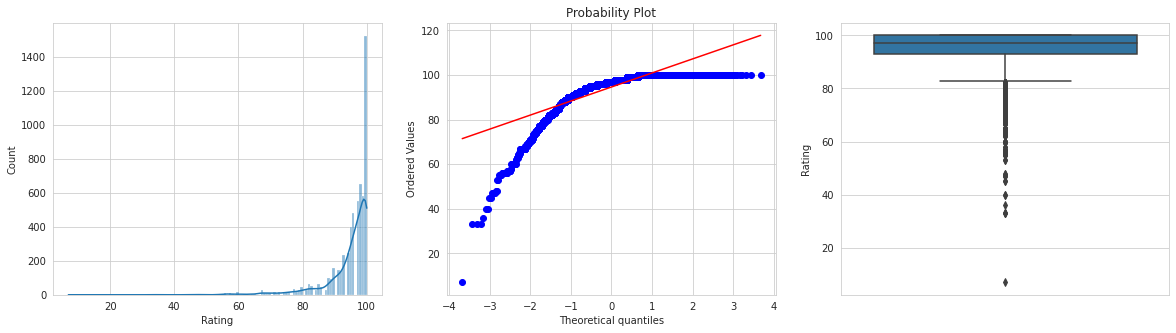

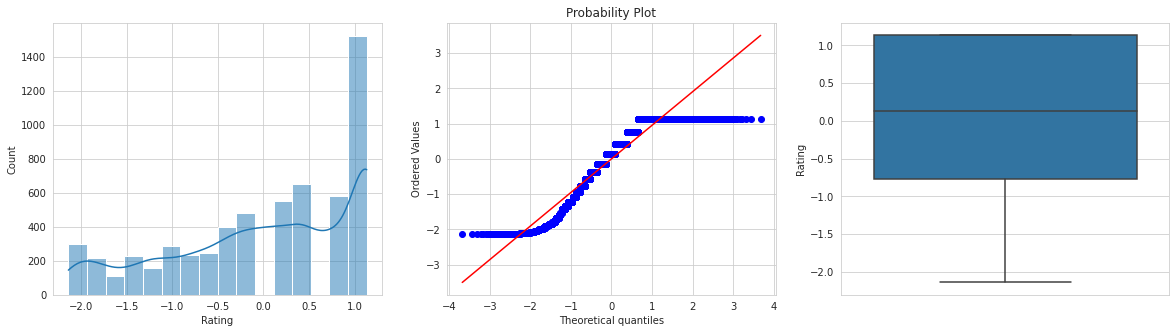

In [68]:
import scipy.stats as stat
import pylab 
for i in ['Experience','Rating']:
  pplot(df,i)
  pplot(pt1,i)

after transformation experience is almost normaly distributed but Rating is not normaly distributed 

In [69]:
from sklearn.preprocessing import power_transform as PT
test_pt=pd.DataFrame()
for i in ['Experience','Rating']:
  if test_df[i].min()<=0:
    test_pt1=(test_df[i]-test_df[i].min()+0.0001)
  else:
    test_pt1=test_df[i]
  test_pt=pd.concat([test_pt,pd.DataFrame(test_pt1)],axis=1)

test_pt1=PT(test_pt)
test_pt1=pd.DataFrame(test_pt1,columns=['Experience','Rating'])

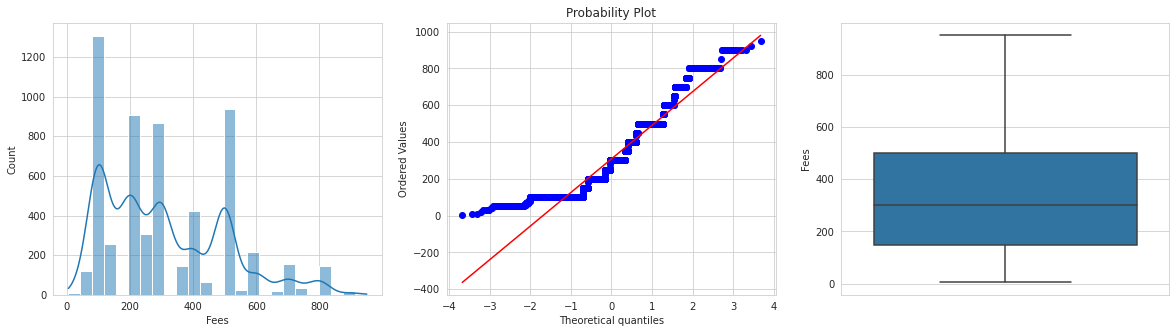

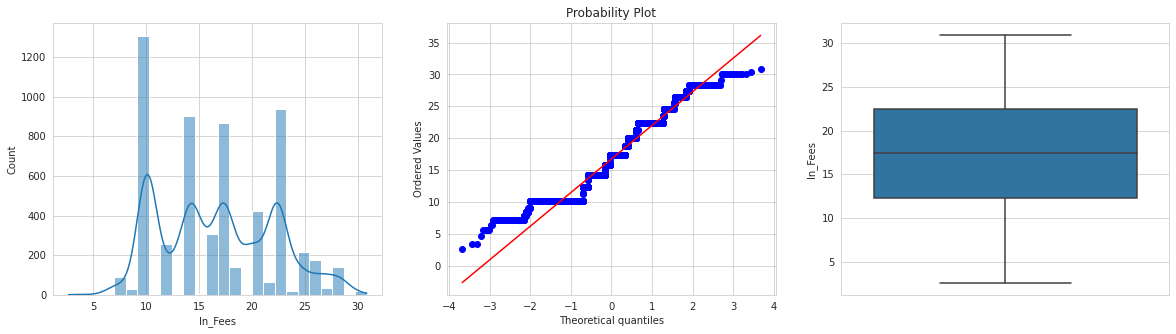

In [70]:
pplot(df,'Fees')
df['ln_Fees']=np.sqrt(df['Fees']+2)# squre root transformation
pplot(df,'ln_Fees')

SQRT transformation give us a non skewed dataset 

In [76]:
test_df=test_df.iloc[:,:-1]

In [77]:
pt1=pd.concat([df.drop(['Experience','Rating','Fees','Profile'],axis=1),pt1[['Experience','Rating']],ohe],axis=1)

In [78]:
test_pt1=pd.concat([test_df.drop(['Experience','Rating','Profile'],axis=1),test_pt1[['Experience','Rating']],test_ohe],axis=1)

## **Correlation**

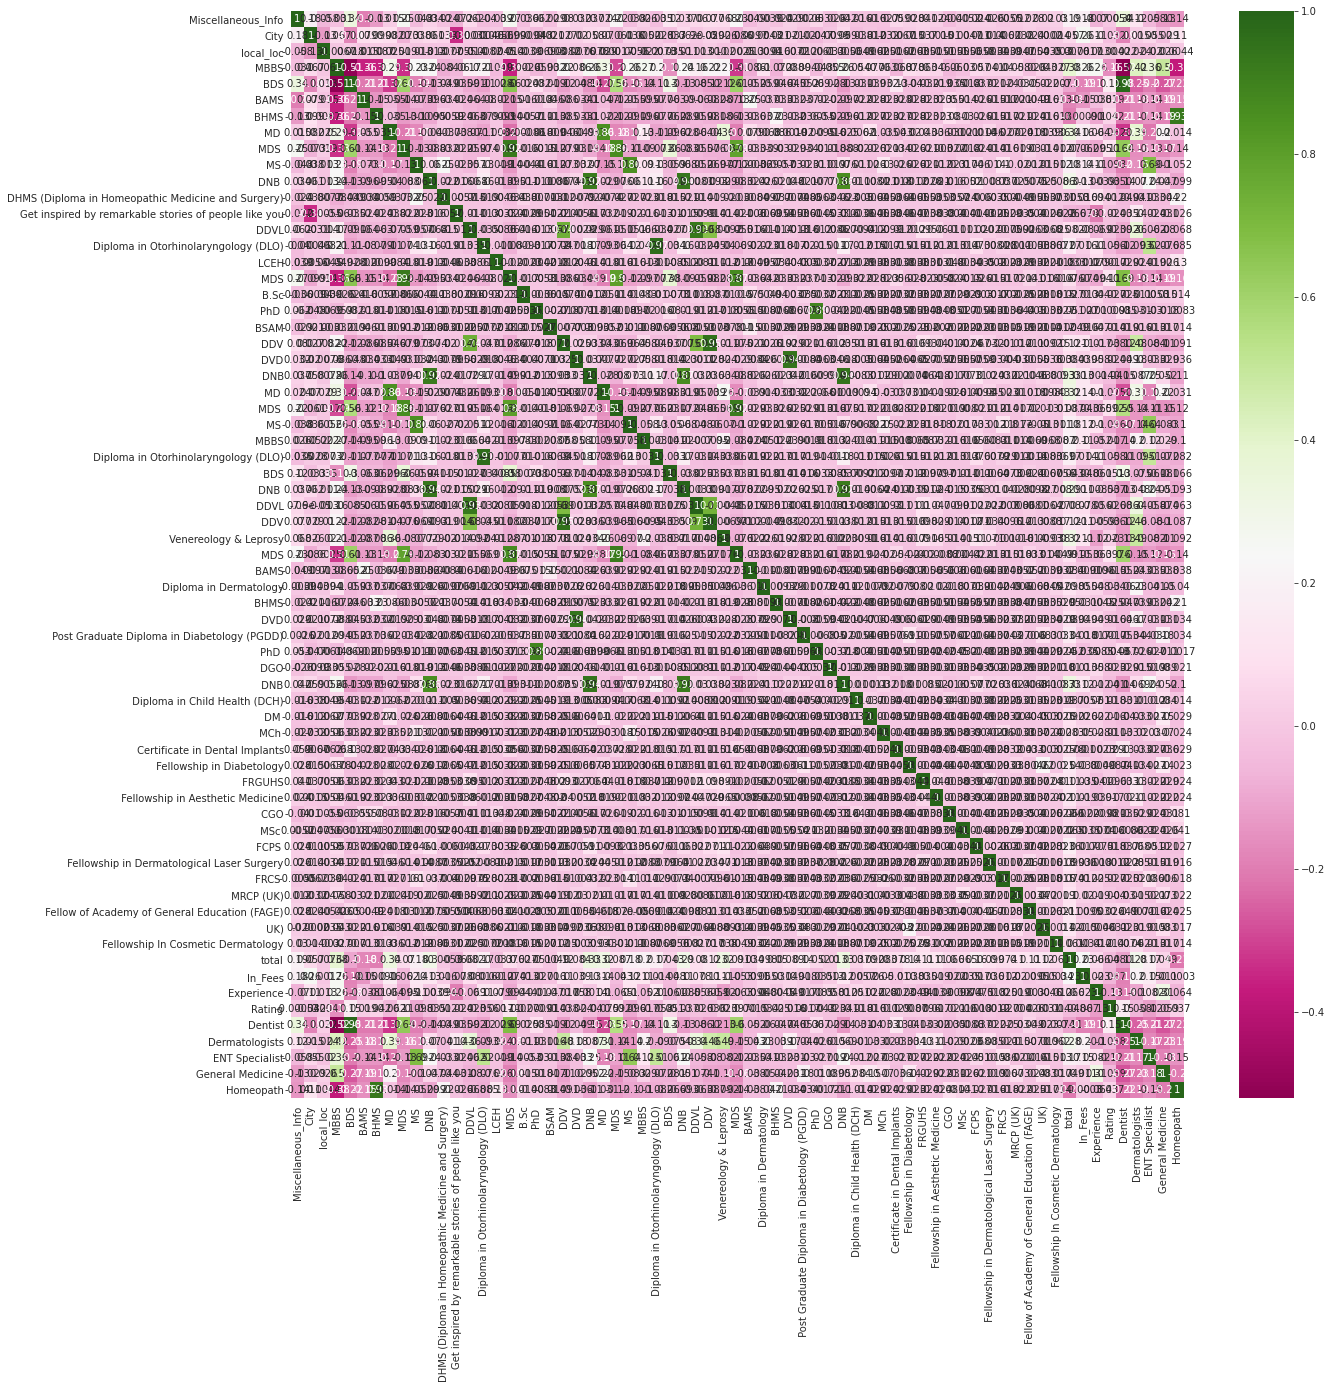

In [632]:
plt.figure(figsize=(20,20))
sns.heatmap(pt1.corr(),cmap='PiYG',annot=True)

ln_fees has no corilation with rating and Experience

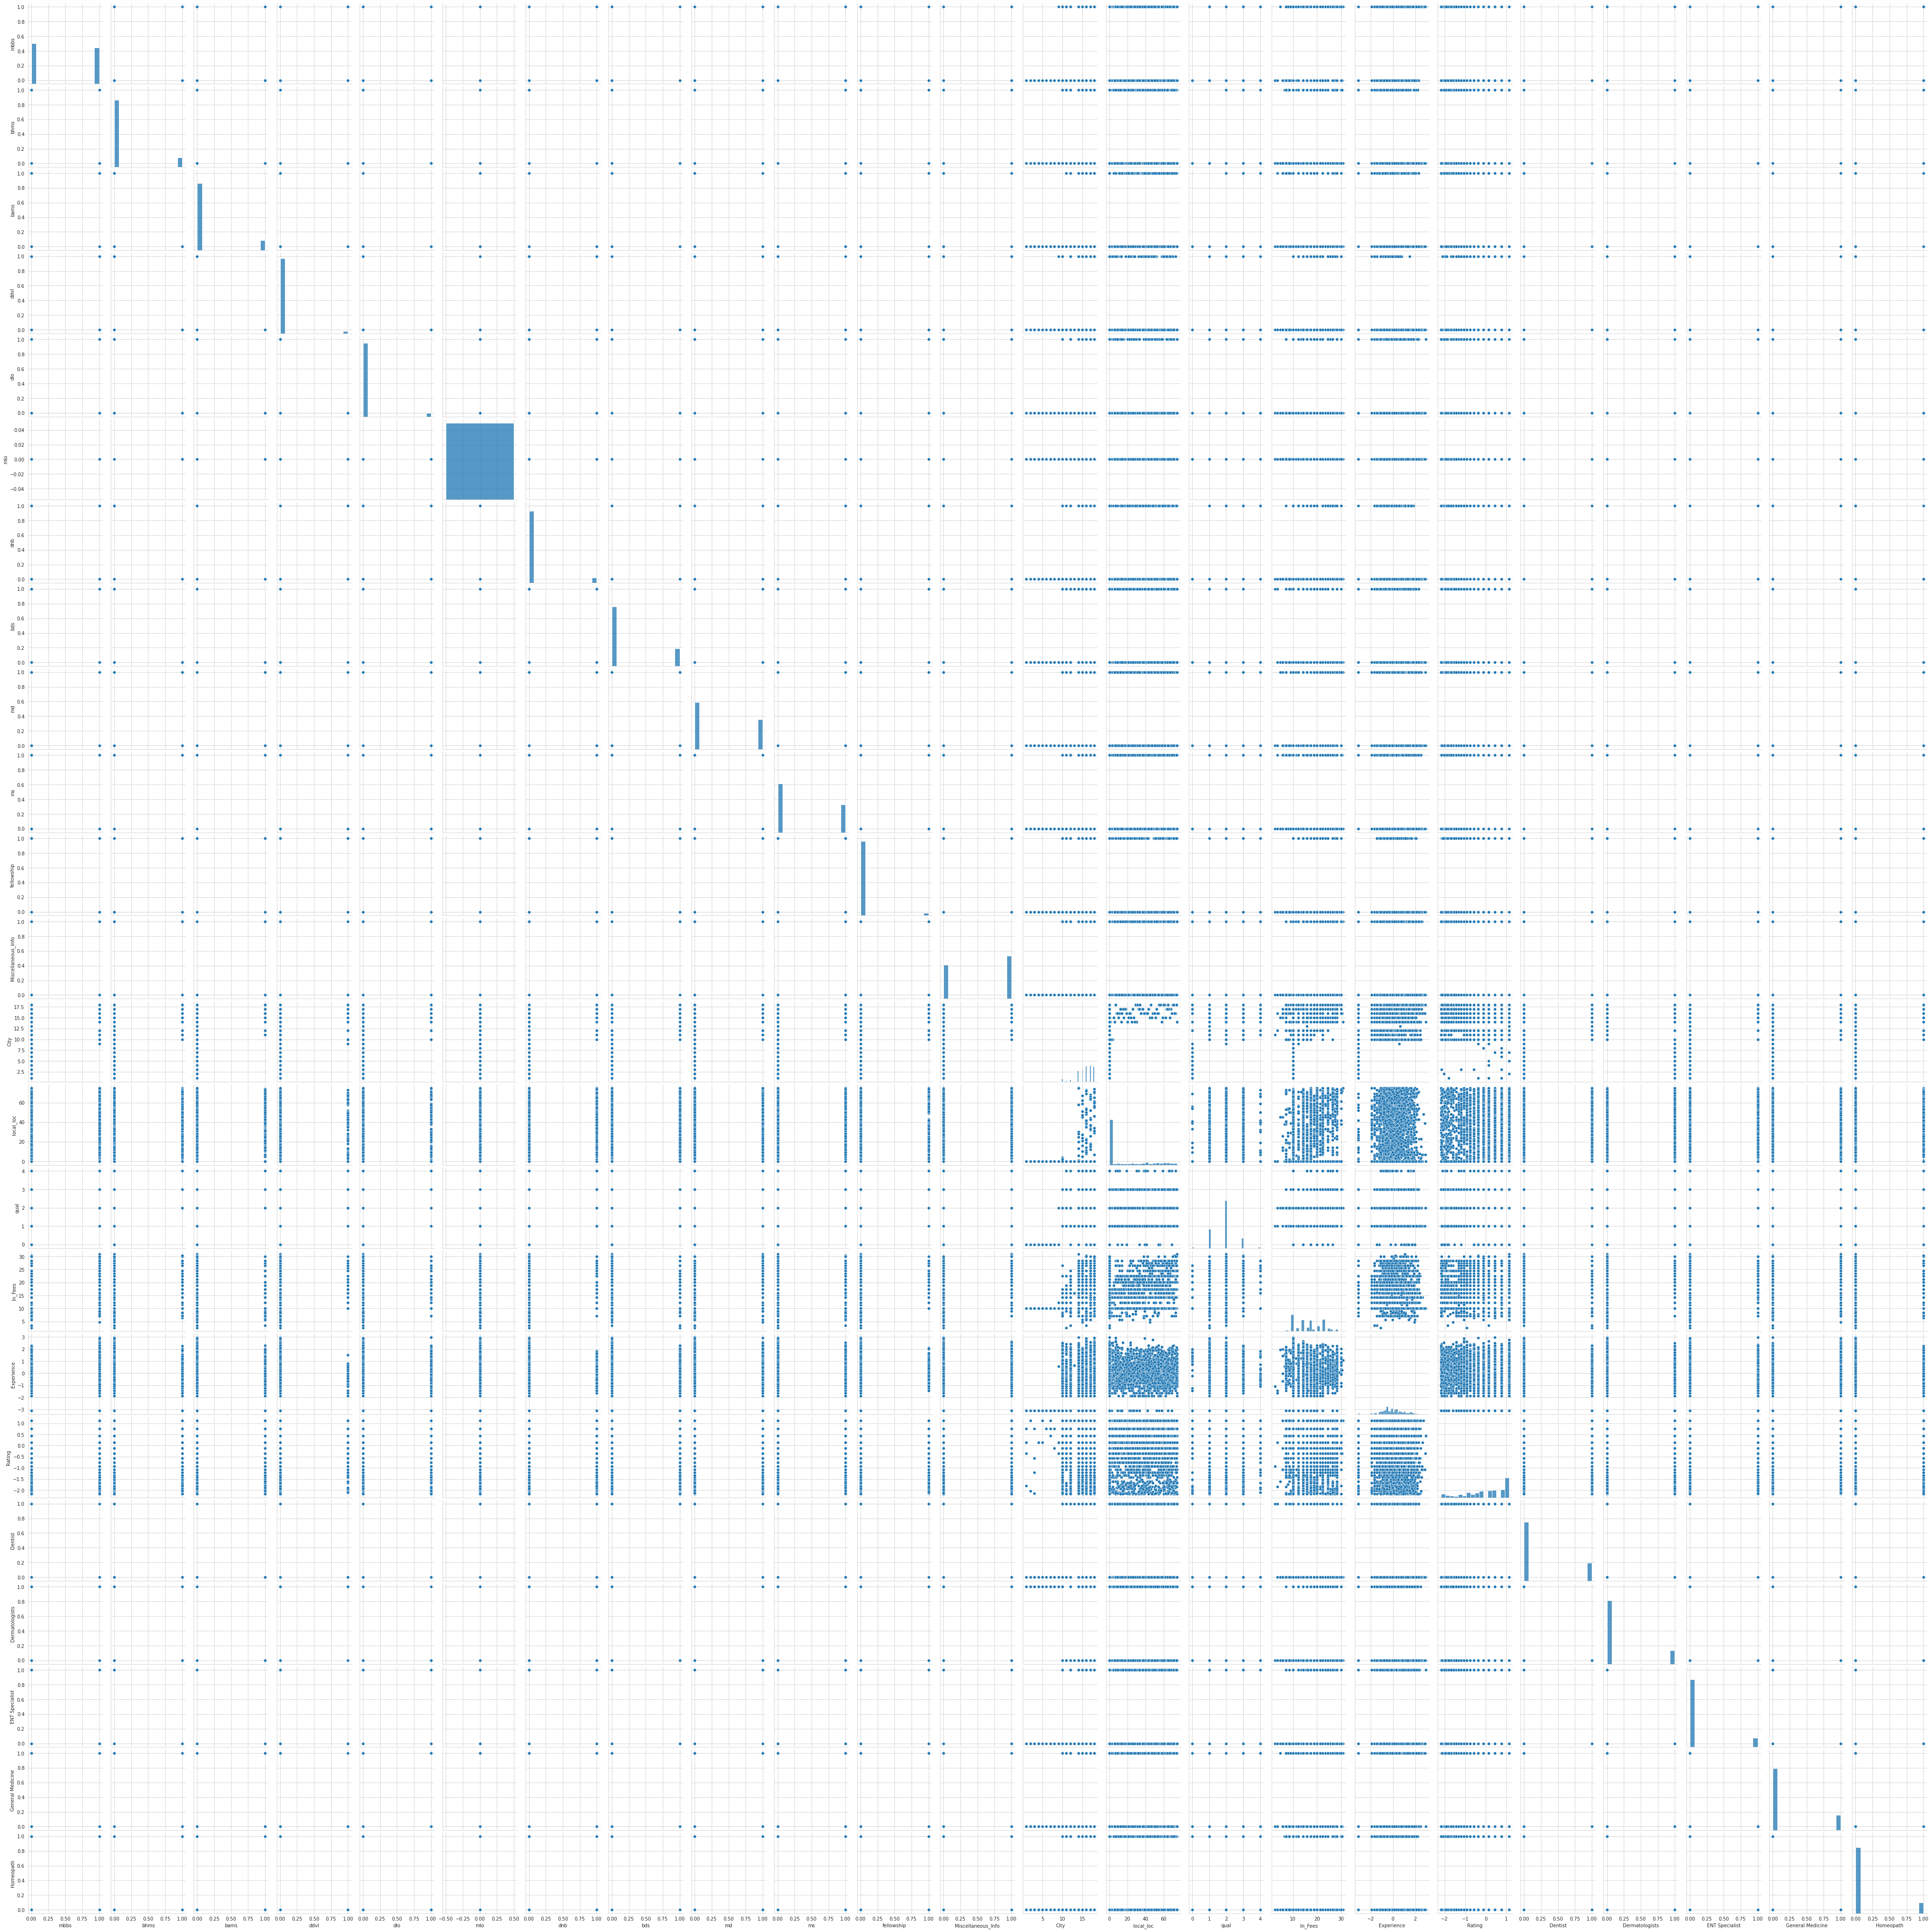

In [ ]:
sns.pairplot(pt1)

In [79]:
x=pt1.drop('ln_Fees',axis=1)
y=pt1['ln_Fees']

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif as anova
s = SelectKBest(anova, k=10)
s.fit(x,y)
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

0              1
BSAM                                                 0.155511   1.000000e+00
 FRCS                                                0.220058   9.999999e-01
 Fellowship In Cosmetic Dermatology                  0.256625   9.999993e-01
DHMS (Diploma in Homeopathic Medicine and Surgery)   0.259181   9.999992e-01
 Diploma in Child Health (DCH)                       0.284056   9.999968e-01
...                                                       ...            ...
total                                               12.252457   1.600375e-73
BDS                                                 14.361560   8.915411e-89
City                                                14.473258   1.389488e-89
Dentist                                             15.006229   1.960886e-93
MBBS                                                19.595714  2.081469e-126

[65 rows x 2 columns]

## **Separating dependent and independent variables**

In [192]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 65 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Miscellaneous_Info                                     5961 non-null   float64
 1   City                                                   5961 non-null   float64
 2   local_loc                                              5961 non-null   int64  
 3   MBBS                                                   5961 non-null   int64  
 4   BDS                                                    5961 non-null   int64  
 5   BAMS                                                   5961 non-null   int64  
 6   BHMS                                                   5961 non-null   int64  
 7   MD                                                     5961 non-null   int64  
 8   MDS                                             

In [82]:
x=pt1.drop('ln_Fees',axis=1)
y=pt1['ln_Fees']

In [83]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=42)
X_test=test_pt1

In [84]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

# **Model Evaluation**

## **Linear Regression**



In [273]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train,y_train)
y_pred=reg_lr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
lr_e=r2_score(y_test,y_pred)

0.2154733021694747
3.7459302564672203


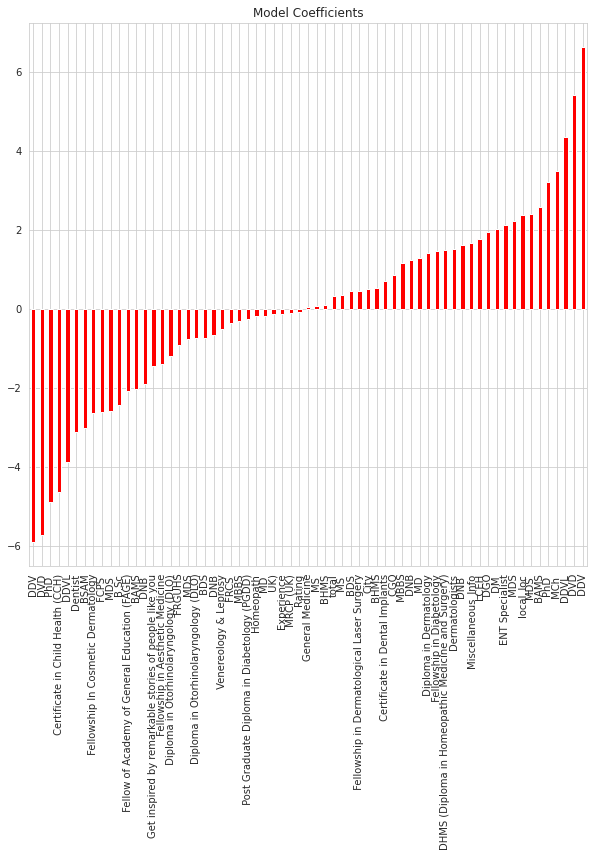

In [274]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [275]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(normalize=True), x, y, cv=3,scoring='r2')

lr_reg=cv_results['test_score'].mean()

In [276]:
lr_reg

0.18656238034736697

## **Ridge**

In [277]:
from sklearn.linear_model import Ridge
reg_lr = Ridge().fit(X=x_train_scaler,y=y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
ridge_e=r2_score(y_test,y_pred)

0.21576781909333786
3.74541683117118


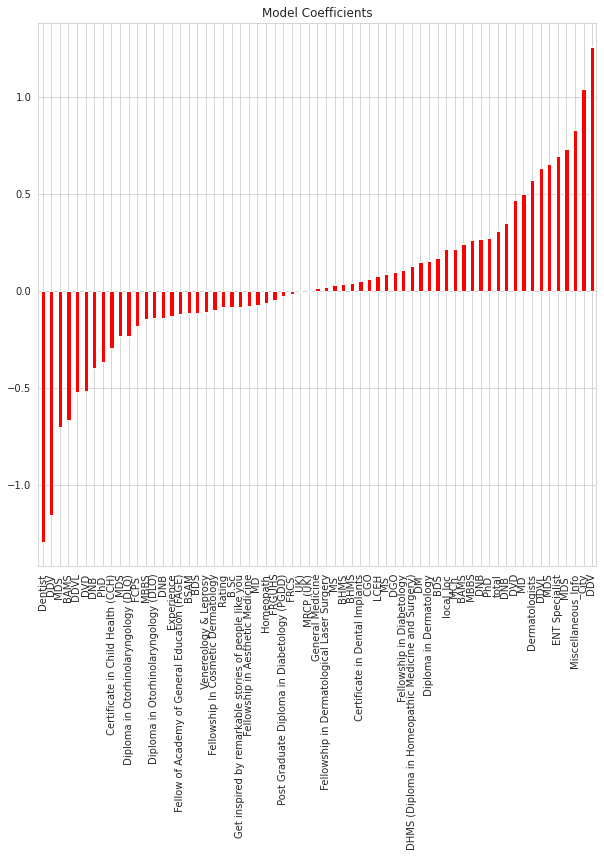

In [278]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [279]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(), ss.transform(x), y, cv=3)

rid_reg=cv_results['test_score'].mean()

In [280]:
rid_reg

0.18693350758431956

## **Random Forest Regressor**


In [281]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
rfr_e=r2_score(y_test,y_pred)

0.13925415220836523
3.897484788030821


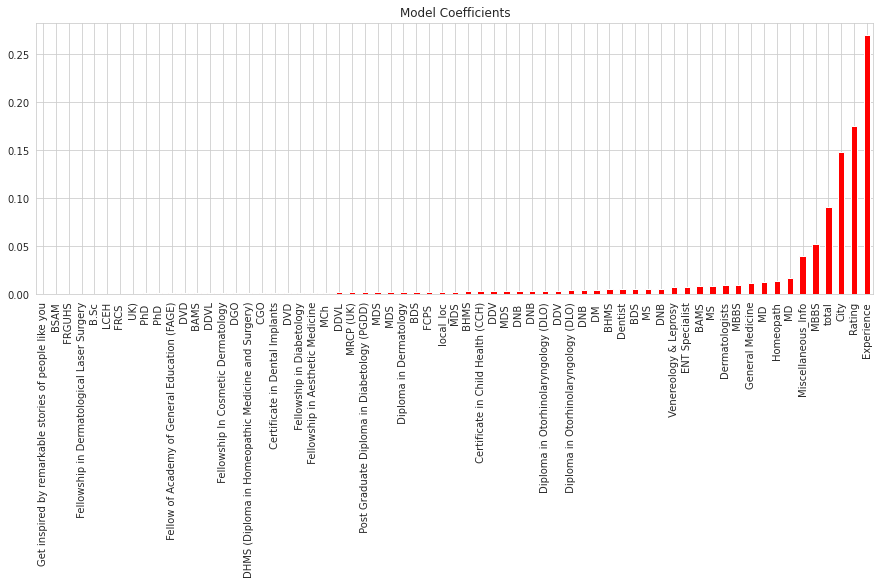

In [282]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [283]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=3)

rfc_score=cv_results['test_score']


In [284]:
rfc_reg=rfc_score.mean()

In [285]:
rfc_reg

0.12234197894351113

## **XGB Regressor**

In [85]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
xgb_e=r2_score(y_test,y_pred)

[10:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.23689447204189984
3.725511951925513


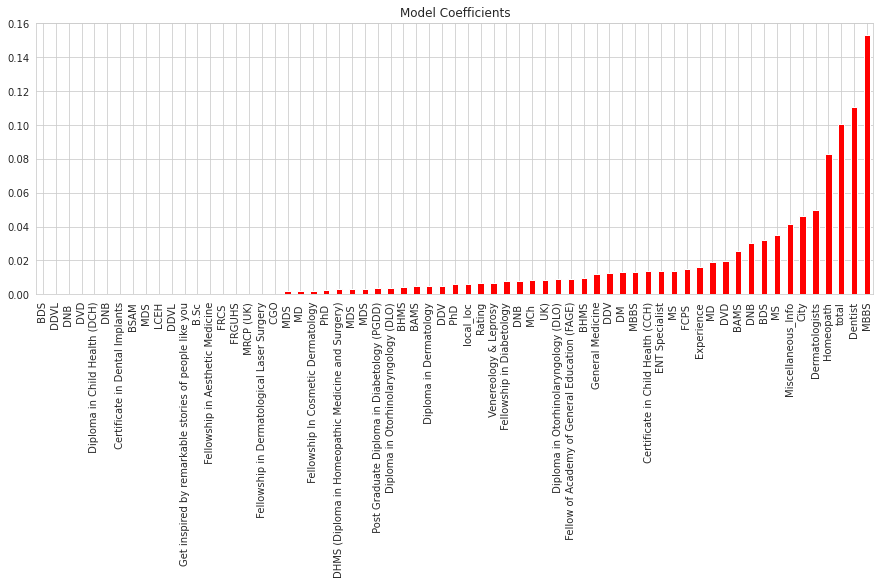

In [86]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [87]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=3)

xgr_score=cv_results['test_score'].mean()




[10:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [289]:
xgr_score

0.21571264070084736

## **Extra Tree Regressor**

In [290]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
etr_e=r2_score(y_test,y_pred)

-0.5717386211537976
4.968415455848097


In [291]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=3)

etc_score=cv_results['test_score'].mean()


In [292]:
etc_score

-0.5000383577652405

## **Support vector Regressor**

In [297]:
from sklearn.svm import SVR

svc = SVR()
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))
svm_e=r2_score(y_test,y_pred)

0.19786516688842715
3.7259809855781154


In [298]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(kernel='linear'), ss.transform(x), y, cv=3)

svc_score=cv_results['test_score'].mean()


In [299]:
svc_score

0.1693535442960756

## **Comparing models**

In [300]:
score=[lr_reg,rid_reg,rfc_reg,xgr_score,etc_score,svc_score]
error=[lr_e,ridge_e,rfr_e,xgb_e,etr_e,svm_e]
name=['LR','Ridge','RFC','XGB','ETC','SVC']
diff=[]
for i in range(6):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

0         1         2          3
0     LR  0.186562  0.215473 -0.0289109
1  Ridge  0.186934  0.215768 -0.0288343
2    RFC  0.122342  0.139254 -0.0169122
3    XGB  0.215713   0.23826 -0.0225475
4    ETC -0.500038 -0.571739  0.0717003
5    SVC  0.169354  0.197865 -0.0285116

XGB can be selected for Hyperparameter 

# **Hyper-parameter tuning** 

In [695]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xg_grid = GridSearchCV(XBR(n_jobs=-1), params, n_jobs=-1, cv=3)
xg_grid.fit(x_train, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

[08:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: 0.20016481252777282
Best score: {'base_score': 1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 5}
Best score: XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [88]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1), x_train,y_train, cv=10)

cv_results['test_score'].mean()

[10:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.21418481648823756

# **Best Model Evaluation**

In [89]:
model=XBR(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(x,y)

[10:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [90]:
y_pred = model.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))

0.26052542412591384
21.62987421292075


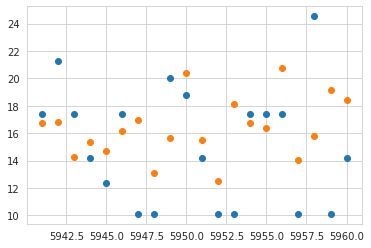

In [91]:
plt.scatter(x=y.index[-20:],y=y[-20:],cmap='blue')
plt.scatter(x=y.index[-20:],y=y_pred[-20:],cmap='red')

(array([  15.,   76.,  256.,  612.,  969., 1253., 1333.,  742.,  434.,
         271.]), array([-15.20459712, -12.59178159,  -9.97896606,  -7.36615053,
         -4.753335  ,  -2.14051947,   0.47229606,   3.08511158,
          5.69792711,   8.31074264,  10.92355817]), <a list of 10 Patch objects>)

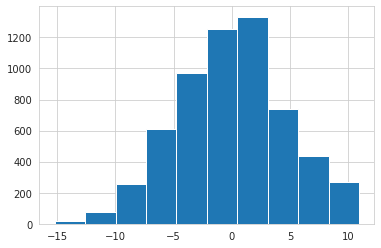

In [92]:
plt.hist((y_pred-y))

#**Genreting result for y test**

In [93]:
y_prediction=model.predict(X_test)

In [95]:
Y_test=np.square(y_prediction)#squaring the prediction

In [98]:
pd.DataFrame(Y_test).to_csv('prdicted_value.csv')# saving result in csv formate

# **Saving the model** 

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pickle

filename = '/content/drive/MyDrive/datatrained/Doc_cons_fee/model.sav'
pickle.dump(model, open(filename, 'wb'))

# **Conclusion**

In [102]:

filename = '/content/drive/MyDrive/datatrained/Doc_cons_fee/model.sav'
model = pickle.load(open(filename, 'rb'))

[10:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
y_pred = model.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.26052542412591384
21.62987421292075


In [105]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

0          1          2     ...       5958       5959       5960
0        15.595087  17.063272  19.758425  ...  15.776557  19.116959  18.422697
ln_Fees  10.099505  18.761663  17.378147  ...  24.535688  10.099505  14.212670

[2 rows x 5961 columns]